# 自己动手做聊天机器人教程 

From https://github.com/warmheartli/ChatBotCourse
http://www.shareditor.com/bloglistbytag/?tagname=%E8%87%AA%E5%B7%B1%E5%8A%A8%E6%89%8B%E5%81%9A%E8%81%8A%E5%A4%A9%E6%9C%BA%E5%99%A8%E4%BA%BA

## 2 初识nltk库

In [1]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [2]:
text1.concordance("former")

Displaying 20 of 20 matches:
s of the sea , appeared . Among the former , one was of a most monstrous size 
ce , borrowed from the chaplain ' s former sea - farings . Between the marble 
s him with a fresh lance , when the former one has been badly twisted , or elb
 , though smaller than those of the former order , nevertheless retain a propo
fficial is still retained , but his former dignity is sadly abridged . At pres
 tested reality of his might had in former legendary times thrown its shadow b
g associated with the experience of former perils ; for what knows he , this N
ns and places in which , on various former voyages of various ships , sperm wh
. So that though Moby Dick had in a former year been seen , for example , on w
ed by the defection of seven of his former associates , and stung by the mocki
no part in the mutiny , he told the former that he had a good mind to flog the
 so for ever got the start of their former captain , had he been at all minded
 head is cut off whole 

In [3]:
text1.similar("ship")

whale boat sea world captain way head time man crew other pequod line
deck body fishery air side boats water


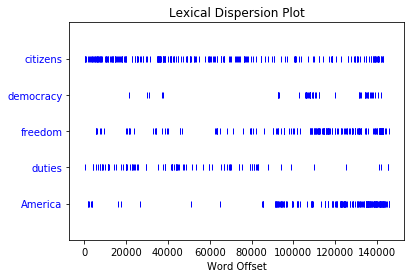

In [4]:
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])

In [5]:
len(set(text4))

9754

In [6]:
text4.count("is")

1403

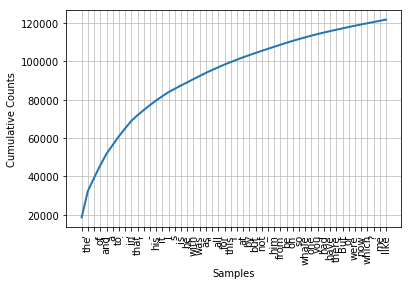

In [7]:
fdist1 = FreqDist(text1); fdist1.plot(50, cumulative=True)

## 3-语料与词汇资源

### 加载自己的语料库

In [4]:
import nltk
from nltk.corpus import brown

In [5]:
genre_word = [(genre, word)
        for genre in brown.categories()
        for word in brown.words(categories=genre)
        ]

In [6]:
cfd = nltk.ConditionalFreqDist(genre_word)

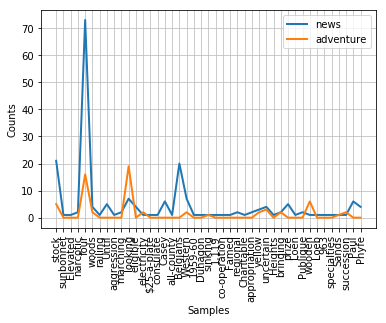

In [7]:
cfd.plot(conditions=['news','adventure'], samples=[u'stock', u'sunbonnet', u'Elevated', u'narcotic', u'four',
                                                   u'woods', u'railing', u'Until', u'aggression', u'marching', u'looking',
                                                   u'eligible', u'electricity', u'$25-a-plate', u'consulate', u'Casey',
                                                   u'all-county', u'Belgians', u'Western', u'1959-60', u'Duhagon', u'sinking',
                                                   u'1,119', u'co-operation', u'Famed', u'regional', u'Charitable', u'appropriation',
                                                   u'yellow', u'uncertain', u'Heights', u'bringing', u'prize', u'Loen', u'Publique',
                                                   u'wooden', u'Loeb', u'963', u'specialties', u'Sands', u'succession', u'Paul', u'Phyfe'])

In [13]:
# 循环10次，从cfdist中取当前单词最大概率的连词,并打印出来
def generate_model(cfdist, word, num=10):
    for i in range(num):
        print (word),
        word = cfdist[word].max()

# 加载语料库
text = nltk.corpus.genesis.words('english-kjv.txt')

# 生成双连词
bigrams = nltk.bigrams(text)

# 生成条件频率分布
cfd = nltk.ConditionalFreqDist(bigrams)

# 以the开头，生成随机串
generate_model(cfd, 'fly')

fly
above
the
land
of
the
land
of
the
land


## 4 自动化对语料做词性标注

### 英文词干提取器

In [15]:
porter = nltk.PorterStemmer()
porter.stem('lying')

'lie'

In [16]:
text = nltk.word_tokenize("And now for something completely different")

In [17]:
nltk.pos_tag(text)

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

#### CC是连接词，RB是副词，IN是介词，NN是名次，JJ是形容词 
#### 自己标注

In [18]:
tagged_token = nltk.tag.str2tuple('fly/NN')
tagged_token

('fly', 'NN')

In [19]:
sent = '我/NN 是/IN 一个/AT 大/JJ 笨蛋/NN'
[nltk.tag.str2tuple(t) for t in sent.split()]

[('我', 'NN'), ('是', 'IN'), ('一个', 'AT'), ('大', 'JJ'), ('笨蛋', 'NN')]

In [20]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [ ]:
#sinica 中文语料库
for word in nltk.corpus.sinica_treebank.tagged_words():
    print (word[0], word[1])
    
#简体中文语料库    https://github.com/fxsjy/jieba

In [24]:
pattern = [(r'.*们$','PRO')]
tagger = nltk.RegexpTagger(pattern)
print (tagger.tag(nltk.word_tokenize('我们 去 你们 和 他们 啊')))

[('我们', 'PRO'), ('去', None), ('你们', 'PRO'), ('和', None), ('他们', 'PRO'), ('啊', None)]


## 5 文本分类

In [3]:
import nltk

my_train_set = [
        ({'feature1':u'a'},'1'),
        ({'feature1':u'a'},'2'),
        ({'feature1':u'a'},'3'),
        ({'feature1':u'a'},'3'),
        ({'feature1':u'b'},'2'),
        ({'feature1':u'b'},'2'),
        ({'feature1':u'b'},'2'),
        ({'feature1':u'b'},'2'),
        ({'feature1':u'b'},'2'),
        ({'feature1':u'b'},'2'),
        ]
classifier = nltk.NaiveBayesClassifier.train(my_train_set)
print (classifier.classify({'feature1':u'a'}))
print (classifier.classify({'feature1':u'b'}))

3
2


## 6 分块

IOB标记，I(inside，内部)、O(outside，外部)、B(begin, 开始)  
树结构来存储分块

In [13]:
from nltk.corpus import conll2000
print (conll2000.chunked_sents('train.txt')[99])

(S
  (PP Over/IN)
  (NP a/DT cup/NN)
  (PP of/IN)
  (NP coffee/NN)
  ,/,
  (NP Mr./NNP Stone/NNP)
  (VP told/VBD)
  (NP his/PRP$ story/NN)
  ./.)


## 7 文法特征结构  
文法特征举例：单词最后一个字母、词性标签、文法类别、正字拼写、指示物、关系、施事角色、受事角色

In [14]:
fs1 = nltk.FeatStruct(TENSE='past', NUM='sg')

In [15]:
nltk.FeatStruct(POS='N', AGR=fs1)

[AGR=[NUM='sg', TENSE='past'], POS='N']

In [16]:
from nltk import load_parser
cp = load_parser('grammars/book_grammars/sql0.fcfg')
query = 'What cities are located in China'
tokens = query.split()

sq10.fcfg   一个查找国家城市的sql语句的文法

In [23]:
for tree in cp.parse(tokens):
    print (tree)

(S[SEM=(SELECT, City FROM city_table, WHERE, , , Country="china")]
  (NP[SEM=(SELECT, City FROM city_table)]
    (Det[SEM='SELECT'] What)
    (N[SEM='City FROM city_table'] cities))
  (VP[SEM=(, , Country="china")]
    (IV[SEM=''] are)
    (AP[SEM=(, Country="china")]
      (A[SEM=''] located)
      (PP[SEM=(, Country="china")]
        (P[SEM=''] in)
        (NP[SEM='Country="china"'] China)))))


## 9 聊天机器人 

## 10 词性标注与关键词提取

In [1]:
import pynlpir

In [2]:
#liscence needs to be updated per month
pynlpir.open()
s = '聊天机器人到底该怎么做呢？'
segments = pynlpir.segment(s)
for segment in segments:
    print (segment[0], '\t', segment[1])

pynlpir.close()

聊天 	 verb
机器人 	 noun
到底 	 adverb
该 	 verb
怎么 	 pronoun
做 	 verb
呢 	 modal particle
？ 	 punctuation mark


In [5]:
pynlpir.open()
key_words = pynlpir.get_key_words(s, weighted=True)
for key_word in key_words:
    print (key_word[0], '\t', key_word[1])
pynlpir.close()

聊天 	 2.0
机器人 	 2.0


返回的是tuple(token, pos)，其中token就是切出来的词，pos就是语言属性

In [8]:
pynlpir.open()
s = '海洋是如何形成的'
segments = pynlpir.segment(s, pos_names='all',pos_english=False)
for segment in segments:
    print (segment[0], '\t', segment[1])
pynlpir.close()

海洋 	 名词
是 	 动词:动词"是"
如何 	 代词:疑问代词:谓词性疑问代词
形成 	 动词
的 	 助词:的／底


## 11  0字节存储海量语料资源

In [2]:
## 关键词提取
import pynlpir

pynlpir.open()
s = '怎么才能把电脑里的垃圾文件删除'

key_words = pynlpir.get_key_words(s, weighted=True)
for key_word in key_words:
    print (key_word[0], '\t', key_word[1])

pynlpir.close()

电脑 	 2.0
垃圾 	 2.0
文件 	 2.0
删除 	 1.0


### See http://www.shareditor.com/blogshow/?blogId=76
### 充分利用搜索引擎
几大搜索引擎的调用接口，首先我们来探索一下百度，百度的接口是这样的：

https://www.baidu.com/s?wd=机器学习 数据挖掘 信息检索

In [1]:
import scrapy

In [ ]:
#execute under Anaconda prompt 
scrapy startproject baidu_search
New Scrapy project 'baidu_search', using template directory 'c:\\anaconda\\lib\\site-packages\\scrapy\\templates\\project', created in:
    C:\Users\Xinkun Chu\Documents\OpenCourse\Machine Learning\code\nltk_data\baidu_search

You can start your first spider with:
    cd baidu_search
    scrapy genspider example example.com

scrapy crawl baidu_search


### 语料提取
上面得到的仅是搜索结果，它只是一种索引，真正的内容需要进入到每一个链接才能拿到

我们来分析一下result.html这个抓取百度搜索结果文件
每一条链接都是嵌在class=c-container这个div里面的一个h3下的a标签的href属性